In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
%matplotlib notebook
matplotlib.rcParams["figure.figsize"] = (6,6)

# Intuition for the normal equation

This notebook assumes the reader is familiar with linear algebra concepts like projections and orthogonality. If you need to brush up, I recommend this [course](https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm) or these [videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). Lectures 15 and 16 from the course might be particularly helpful, as they heavily inspired this notebook.

Our goal is to develop intuition for the normal equation: 

$$A^{T}A\hat{x} = A^{T}b$$

But before we get started, we'll need these funcitons to help us with plotting:



In [11]:
def get_ax():
    fig = plt.figure()
    return fig.add_subplot(111, projection='3d')

def plot_pts(pts, ax):
    for pt in pts:
        ax.scatter([pt[0]], [pt[1]], [pt[2]], label=",".join([str(coor)[:4] for coor in pt]))
    ax.set_xlim((0,3))
    ax.set_ylim((0,3))
    ax.set_zlim((0,3))
    ax.legend()
    return ax

def plot_line(pts, ax, linestyle='-', color='black', label=None):
    if not label:
        label= ",".join([str(coor)[:4] for coor in pts[1]])
    ax.plot([c[0] for c in pts], [c[1] for c in pts], [c[2] for c in pts], 
            label=label, linestyle=linestyle, color=color)
    return ax

Roughly speaking, when there's no solution to a linear equation $Ax=b$, the normal equation helps us find the best approximation $A\hat{x}=b$. 

That doesn't help us with our intuition at all, so let's introduce an example we'll use throughout the rest of the notebook. Say we have data that consist of two variables, and we want to find the line that best describes the relationship between those two variables. Our data might be the points (1,1), (2,2) and (3,2), which look like this: 

<IPython.core.display.Javascript object>


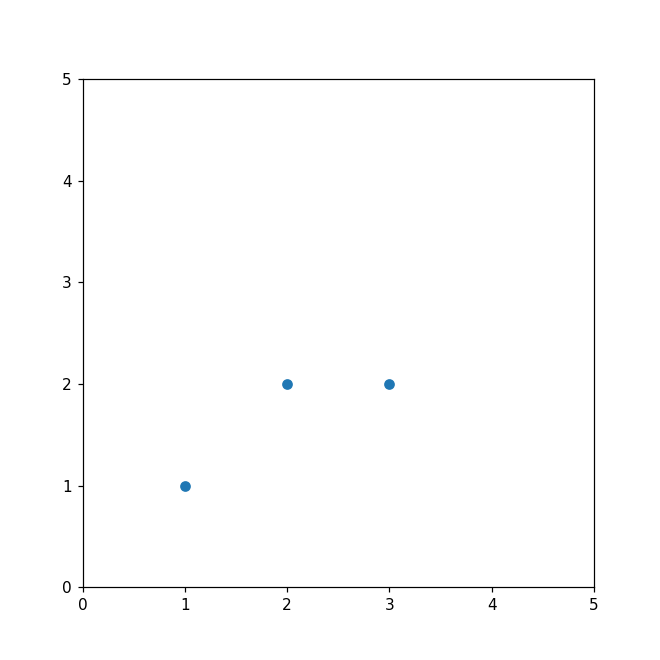

(0, 5)

In [12]:
pt1 = np.array([1,1])
pt2 = np.array([2,2])
pt3 = np.array([3,2])

x_coor = np.vstack([pt1, pt2, pt3])[:, 0]
y_coor = np.vstack([pt1, pt2, pt3])[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coor,y_coor)
ax.set_xlim((0,5))
ax.set_ylim((0,5))

We can express the relationship between our x-coordinates and y-coordinates in the matrix form we mentioned above, $Ax=b$. We form $A$ by combining a vector of ones (for our line intercept) with our x-coordinates. We create $b$ by setting it equal to our y-coordinates. Note that the vector $x$ in $Ax=b$ is no longer our x-coordinates. It's now the vector of coefficients (intercept and slope) that solve the equation.

$$
 A = \begin{bmatrix}
  1 & 1 \\
  1 & 2 \\
  1 & 3
 \end{bmatrix}
$$

$$
 b = \begin{bmatrix}
  1 \\
  2 \\
  2
 \end{bmatrix}
$$


$$
    \begin{equation}
        Ax=b \longrightarrow \begin{bmatrix}
          1 & 1 \\
          1 & 2 \\
          1 & 3
         \end{bmatrix} 
        \begin{bmatrix}
         x_1 \\
         x_2
         \end{bmatrix} = 
        \begin{bmatrix}
          1 \\
          2 \\
          2
         \end{bmatrix}
    \end{equation}
$$

By looking at the plot above, we can see there's no line that passes through our three points. Equivalently, by looking at our data in $Ax=b$ form, we can see there's no solution to the equation. No linear combination of the columns of $A$ will equal $b$, or said another way, $b$ is not in the column space of $A$, which we can visualize by plotting the columns of $A$ and $b$ as vectors in $\mathbb{R}^3$:

<IPython.core.display.Javascript object>


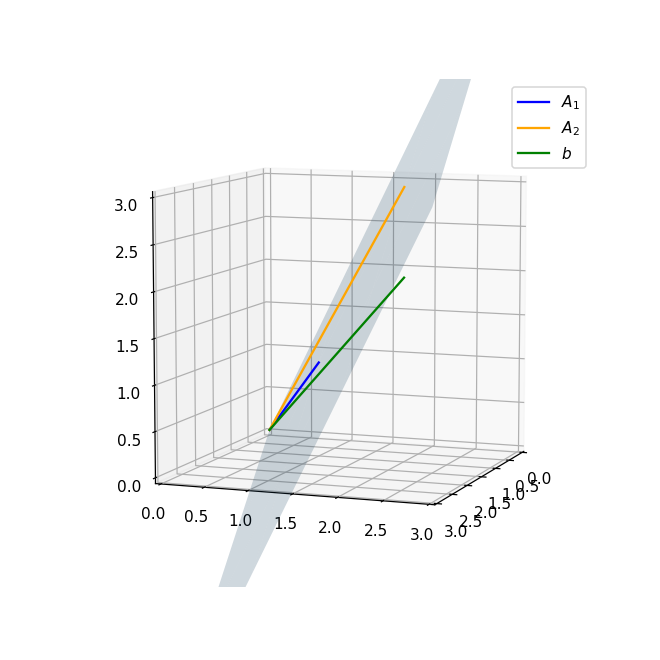

In [15]:
A = np.vstack([np.ones(3), x_coor]).T
b = y_coor
o=[0,0,0]

#Use rearrangments of normal equation to solve for our variables of interest. To be explained later
At_A_inv = np.linalg.inv(A.T.dot(A))
p =  A.dot(At_A_inv).dot(A.T).dot(b)
err = b - p
x_hat = (At_A_inv).dot(A.T).dot(b)

#equation for the plane
xx, yy = np.meshgrid(range(4), range(4))
get_z = lambda x,y: ((3*err[2]) + (2*err[1]) - (y*err[1]) + err[0] - (x*err[0])) / err[2]  
z = get_z(xx, yy)

ax = get_ax()
ax = plot_line([o, A[:, 0]], ax, color='blue', label='$A_1$')
ax = plot_line([o, A[:, 1]], ax,  color='orange', label='$A_2$')
ax = plot_line([o, b], ax, color='green', label='$b$')
ax.set_xlim((0,3))
ax.set_ylim((0,3))
ax.set_zlim((0,3))
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.legend()

In the plot above, the gray plane is the column space of $A$, and by clicking and dragging to rotate the plot, you can see that $b$ is not in it.

Because $b$ is not in the plane, there's no solution to $Ax=b$. The key idea is that to make it solvable, we can replace our original $b$ with the vector in the plane that is closest to $b$. This vector is the projection, $p$, of $b$ onto the plane.


<IPython.core.display.Javascript object>


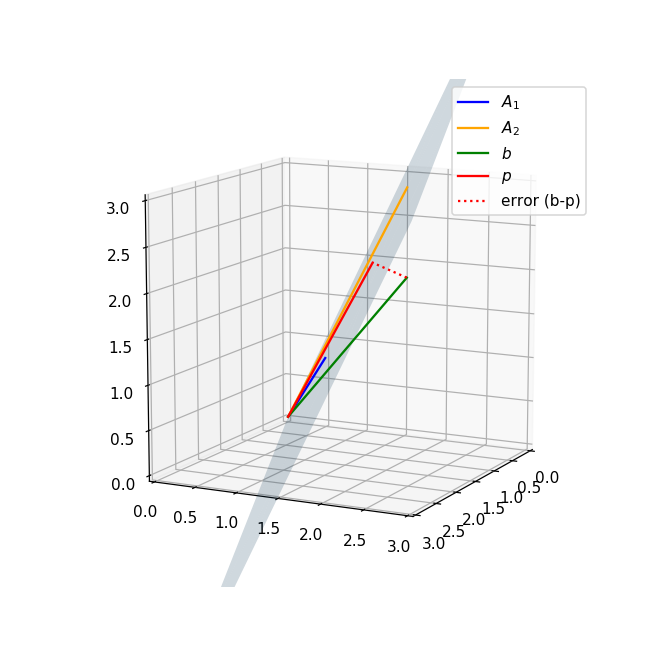

In [14]:
ax = get_ax()
ax = plot_line([o, A[:, 0]], ax, color='blue', label='$A_1$')
ax = plot_line([o, A[:, 1]], ax,  color='orange', label='$A_2$')
ax = plot_line([o, b], ax, color='green', label='$b$')
ax = plot_line([o, p], ax, color='red', label='$p$')
ax = plot_line([b,p],ax, linestyle=':',  color='red', label='error (b-p)')
ax.set_xlim((0,3))
ax.set_ylim((0,3))
ax.set_zlim((0,3))

ax.plot_surface(xx, yy, z, alpha=0.2)
ax.legend()


Notice that we've plotted $p$ and the error in our approximation, $b-p$. By definintion, that error vector is orthogonal to the plane, as you can see in the plot. We can create the normal equation from this fact!

Because the dot product of two orthogonal vectors equals zero and $p = A\hat{x}$ (shown below), we can write:

$$A^{T}(b-A\hat{x}) = 0$$

This is just saying that our error vector ($b-A\hat{x}$) is orthogonal to the column space of $A$.

From there, we can multiply $A^{T}$ and what's inside the parentheses:

$$A^{T}b - A^{T}A\hat{x} = 0 $$

Then rearrange:

$$A^{T}A\hat{x} = A^{T}b$$

And there's the normal equation!

We can then use it to solve for the variables we're interested in (which we did in code cells above to create our plots). We can find $\hat{x}$:
    
$$\hat{x} = (A^TA)^{-1}A^Tb $$

Or the projection, $p$:

$$p = A(A^TA)^{-1}A^Tb = A\hat{x} $$

Or the projection matrix, $P$, that will project any vector onto the column space of $A$:

$$P = A(A^TA)^{-1}A^T $$

Now that we have $\hat{x}$, let's use it to plot our line, $y = A\hat{x}$:


<IPython.core.display.Javascript object>


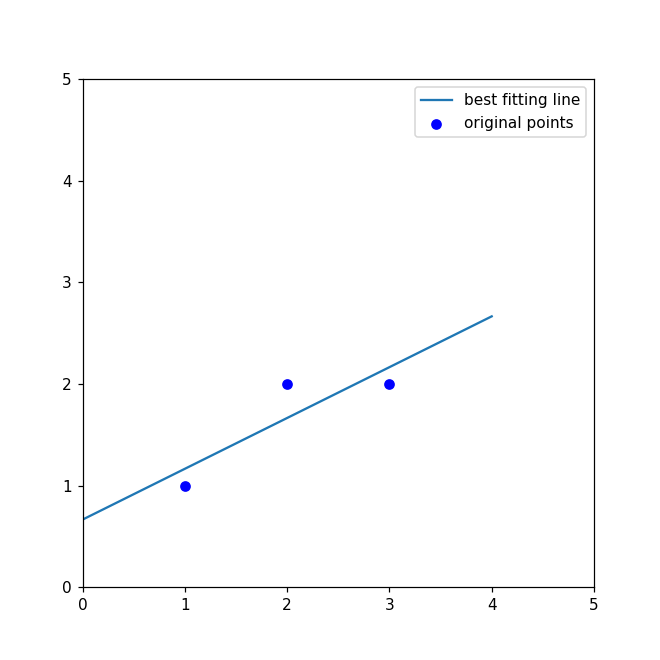

In [9]:
xs = np.arange(5)
A_line = np.vstack([np.ones(5), xs]).T
ys = A_line.dot(x_hat)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coor,y_coor, color='blue', label='original points')
ax.plot(xs,ys, label='best fitting line')
orig_pts = np.vstack([x_coor, y_coor]).T
ax.set_xlim((0,5))
ax.set_ylim((0,5))
ax.legend()


## Summary

Here's a quick recap of what we just did:
- We expressed our 2d points in matrix form: $Ax=b$
- We saw that $b$ was not in the column space of $A$, so $Ax=b$ was not solvable
- To make it solvable, we replaced $b$ with its projection, $p$, onto the column space of $A$
- By definition, the error, $b-p$, is orthogonal to $A$. So, substituting $A\hat{x}$ for $p$, we can write $A^{T}(b-A\hat{x}) = 0$
- With a little algebra, we turned that equation into the normal equation